# Preparing Data
Lets upload our data and change our working direcctory to the directory that has our data. 
Data can be found at 

https://github.com/divyam96/TheSchoolOfAI-EVA5-Assignments/tree/master/Assignment%2012/Part%20B%20Divyam/Assignment12%20images

In [8]:
%cd Assignment12\ images

/content/Assignment12 images


## Read annotation JSON

JSON can be found here:

https://github.com/divyam96/TheSchoolOfAI-EVA5-Assignments/blob/master/Assignment%2012/Part%20B%20Divyam/divyam_assignment-12_json.json

In [1]:
import json
from PIL import Image

In [3]:
with open("divyam_assignment-12_json.json") as f:
  json_dict = json.load(f)

## Understand sample data point

In [5]:
json_dict.keys()

dict_keys(['2Q__ (1).jpg8968', '2Q__ (2).jpg8680', '2Q__ (3).jpg6835', '2Q__ (4).jpg11779', '2Q__ (5).jpg5686', '2Q__ (6).jpg7651', '2Q__.jpg9517', '9k_ (1).jpg12170', '9k_ (2).jpg9368', '9k_ (3).jpg7427', '9k_ (4).jpg7706', '9k_ (5).jpg10166', '9k_ (6).jpg5342', '9k_.jpg6062', 'images (1).jpg10880', 'images (2).jpg8711', 'images (3).jpg7698', 'images (4).jpg5527', 'images (5).jpg9327', 'images (6).jpg8274', 'images (7).jpg12282', 'images (8).jpg6867', 'images (9).jpg6665', 'images (10).jpg10502', 'images (11).jpg7232', 'images (12).jpg8116', 'images (13).jpg8490', 'images (14).jpg6053', 'images (15).jpg4602', 'images (16).jpg7951', 'images (17).jpg6023', 'images (18).jpg9816', 'images (19).jpg3191', 'images (20).jpg5035', 'images (21).jpg6867', 'images (22).jpg5462', 'images (23).jpg5638', 'images (24).jpg9184', 'images (25).jpg8820', 'images (26).jpg13756', 'images (27).jpg8780', 'images (28).jpg5647', 'images (29).jpg14813', 'images (30).jpg11626', 'images (31).jpg12083', 'images (3

In [45]:
json_dict['2Q__ (1).jpg8968']

{'file_attributes': {'caption': '', 'image_url': '', 'public_domain': 'no'},
 'filename': '2Q__ (1).jpg',
 'regions': [{'region_attributes': {'image_quality': {'frontal': True,
     'good': True,
     'good_illumination': True},
    'name': 'hardhat1',
    'type': 'hardhat'},
   'shape_attributes': {'height': 63,
    'name': 'rect',
    'width': 74,
    'x': 56,
    'y': 14}},
  {'region_attributes': {'image_quality': {'frontal': True,
     'good': True,
     'good_illumination': True},
    'name': 'mask1',
    'type': 'mask'},
   'shape_attributes': {'height': 44,
    'name': 'rect',
    'width': 46,
    'x': 71,
    'y': 79}}],
 'size': 8968}

## Prepare a dataframe from this json using the required fields

In [22]:
bbox_metadata_dict_list = []

for file_key in json_dict:
    
    img = Image.open(json_dict[file_key]['filename'])
    for region in json_dict[file_key]['regions']:
        dp = {}
        dp['file'] = json_dict[file_key]['filename']
        dp['img_w'], dp['img_h'] = img.size
        dp['class'] = region['region_attributes']['type']
        dp['H'] = region['shape_attributes']['height']
        dp['W'] = region['shape_attributes']['width']
        dp['CX'] = region['shape_attributes']['x']
        dp['CY'] = region['shape_attributes']['y']
        bbox_metadata_dict_list.append(dp)



In [33]:
import pandas as pd

df = pd.DataFrame(bbox_metadata_dict_list)

In [34]:
df.head()

,file,img_w,img_h,class,H,W,CX,CY
0,2Q__ (1).jpg,192,263,hardhat,63,74,56,14
1,2Q__ (1).jpg,192,263,mask,44,46,71,79
2,2Q__ (2).jpg,262,192,hardhat,40,67,120,15
3,2Q__ (2).jpg,262,192,mask,38,41,135,61
4,2Q__ (2).jpg,262,192,vest,78,130,87,95


In [47]:
df.shape

(249, 10)

## Finding the value of K

## Normalizing
Here we normalize the height and width of bounding box annotations with the respective height and width of the corresponding image

In [35]:
df['h'] = df['H']/df['img_h']
df['w'] = df['W']/df['img_w']

In [36]:
df.head()

,file,img_w,img_h,class,H,W,CX,CY,h,w
0,2Q__ (1).jpg,192,263,hardhat,63,74,56,14,0.239544,0.385417
1,2Q__ (1).jpg,192,263,mask,44,46,71,79,0.167300,0.239583
2,2Q__ (2).jpg,262,192,hardhat,40,67,120,15,0.208333,0.255725
3,2Q__ (2).jpg,262,192,mask,38,41,135,61,0.197917,0.156489
4,2Q__ (2).jpg,262,192,vest,78,130,87,95,0.406250,0.496183


## Plot normalized values of height and width

In [37]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans

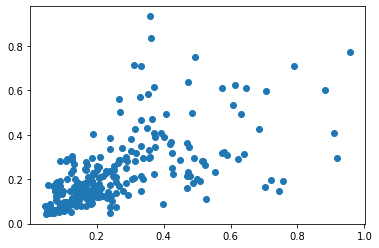

In [38]:
plt.scatter(df['h'], df['w'])

# Find K

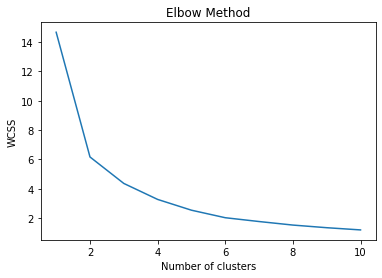

In [40]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit((df[['h', 'w']]))
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

Looking at the above graph k=3 seems appropriate

## Centroids with K=3

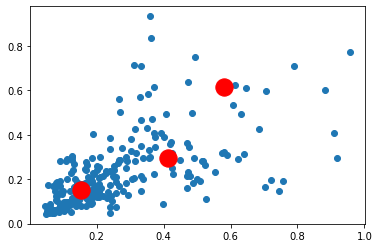

In [44]:
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=0)
pred_y = kmeans.fit_predict(df[['h', 'w']])
plt.scatter(df['h'], df['w'])
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red')
plt.show()